In [1]:
"""

Photo OCR 實作
第一步會先使用套件進行簡單的 Input 和 Output 呈現，這樣和灰階化圖片做結合可以先完成一個階段的任務，
之後第二步會將程式一步一步拆解，方便寫到 C++ 上面。

"""

'\n\nPhoto OCR 實作\n第一步會先使用套件進行簡單的Input和Output呈現，這樣和灰階化圖片做結合可以先完成一個階段的任務，\n之後第二步會將程式一步一步拆解，方便寫到C++上面。\n\n'

In [ ]:
"""

Photo OCR 整體流程由字符區域粗檢測，區域細分割，搜索分割區域，字母分類，語言模型所組成，
檢測的部分主要由馬可夫隨機域 (Markov Random Field) 來進行並對其結果進行 Graph Cut 處理，以探測出字符所在的區域，
字符區域再透過 Anisotropic Gaussian Filter 將多行字符分割成單行而且原本扭曲的方向可進行轉正，
單行字符再透過 HOG 用滑動窗口去將其拆成一個一個的字符，若字符區域的框發生斷裂的話，
則需要透過 Beam Search 和 Lauguage Model 的連續性和字符分類區來糾正發生斷裂的框架，
全部分割完成後，藉由一個簡單的全連接神經層，其輸出個數依次為 : 960-480-480-480-480-100，
每一層都是全連接神經層且與激活函數層ReLU相同，輸入是422維的HOG特徵向量，
輸出類別為99個不同的字符類和1個背景類，然後再透過 n-gram 語言模型進行優化。

"""

In [10]:
from PIL import Image
import pytesseract
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch
import numpy as np

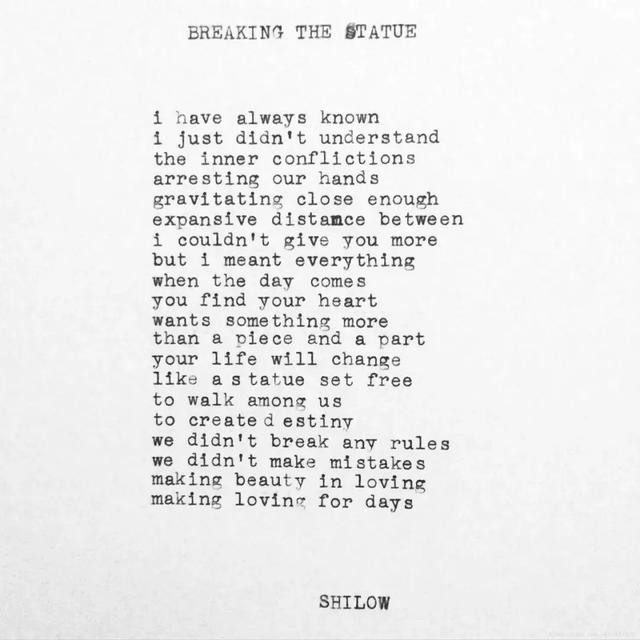

In [30]:
img2 = Image.open("C:\\Users\\Robin\\Desktop\\opentest.jpg")
img2

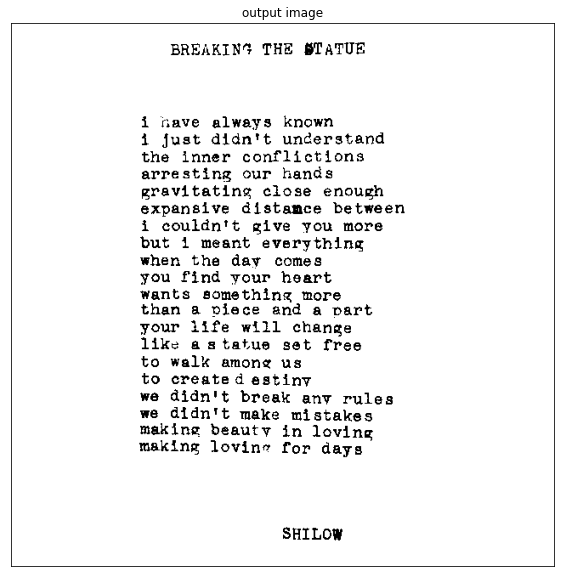

In [31]:
image2 = cv2.imread("C:\\Users\\Robin\\Desktop\\opentest.jpg")
gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
# 將 image 轉成灰階圖

ret2, th2 = cv2.threshold(gray2, 0, 255, cv2.THRESH_OTSU)
# 採取最大類間方差法(ostu)
plt.figure(figsize=(20,10))
plt.imshow(th2, "gray")
plt.title("output image"), plt.xticks([]), plt.yticks([])
plt.show()
# 畫出二值化圖像

9 21 543 543
8 4 549 565
0 0 560 576
13 25 539 538
14 26 537 537
15 27 535 535
9 21 547 543


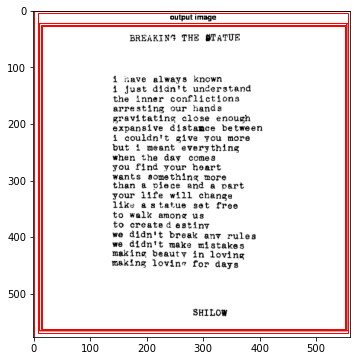

In [32]:
image3 = cv2.imread("C:\\Users\\Robin\\Desktop\\down.jpg")
img_lbl,regions = selectivesearch.selective_search(image3,scale=500,sigma=0.9,min_size=10)

candidates = set()
for r in regions:
    if r['rect'] in candidates:
        continue
        # excluding regions smaller than 2000 pixels
    if r['size'] < 2000:
        continue
        # distorted rects
    x, y, w, h = r['rect']
    if w / h > 1.2 or h / w > 1.2:
        continue
    candidates.add(r['rect'])

    # draw rectangles on the original image
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image3)
for x, y, w, h in candidates:
    print(x, y, w, h)
    rect = mpatches.Rectangle(
        (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)

plt.show()

In [33]:
text3 = pytesseract.image_to_string(image3, lang='eng')
print(text3)

nulpul Image

BREAKING THE UTATUE

5 nave nlways known
1 just didn't understand
the inner canflictions
arresting our hands
gravitltlnq close enough
expansive distance between
1 couldn't give You mars
but 1 meant aux-ythinsg
when the an cams

you Find Vour man»:

wants aamethinz more

than 3 place and . on-t
your ure .111 change

up . 3 came set free

to walk avnoni us

to crenad eacinv

we didn't break anv rules
we dxdnvc make mistakes
mukimz beuutv in loving
mung lovxnn for day:

SHILDV
